#  unixial symmetry analysis

#### Notes (mostly to myself):

<ul>
  <li>The algebra done here are all for d=3 but can easily be implemented to d=2 if needed. One can check via the overleaf doc if it agrees with calculoations done there often I shall do it.</li>
  <li>Im going to be picking explicit vectors <strong>n</strong>,<strong>m</strong>  as this dosent change of any of the calculations as we work with scalars (hence wlog)</li>
  <li>References: I shall try my best to provide a source/references to any "statments" of stability but feel free to ask about things</li>
  <li> The plots after the real hessian is wrong i.e I used the complex hessian not the full one at the moment I have not edited it out yet in case its useful </li>
</ul>

## 1. Algebra check

In [397]:
import sympy as sp
from sympy import pretty_print
##preliminaries wlog we may choose vectors n and m to be [1,0,0] and [0,1,0]
psi1, psi2 = sp.symbols('psi1 psi2', complex=True)
n_vec = sp.Matrix([1,0,0])
m_vec = sp.Matrix([0,1,0])
d = 3    

# E_{ij} tensor
E = psi1*(n_vec*n_vec.T - sp.eye(3)/d) + psi2*(m_vec*m_vec.T - sp.eye(3)/d)
pretty_print(E)
#just testing symbolic computations & derivation first bul term
S = sum(E[i,j] * sp.conjugate(E[i,j]) for i in range(3) for j in range(3))
pretty_print(S)

psi1c, psi2c = sp.symbols('psi1c psi2c', complex=True)
S_sub = sp.expand(S).subs({sp.conjugate(psi1): psi1c, sp.conjugate(psi2): psi2c})
dS_sub = sp.diff(S_sub, psi1c)
result = sp.simplify(dS_sub)
pretty_print(result)  # outputs 2*psi1 + psi2

⎡2⋅ψ₁   ψ₂                        ⎤
⎢──── - ──       0           0    ⎥
⎢ 3     3                         ⎥
⎢                                 ⎥
⎢             ψ₁   2⋅ψ₂           ⎥
⎢    0      - ── + ────      0    ⎥
⎢             3     3             ⎥
⎢                                 ⎥
⎢                          ψ₁   ψ₂⎥
⎢    0           0       - ── - ──⎥
⎣                          3    3 ⎦
            ⎛  __   __⎞                 ⎛  __     __⎞               ⎛  __   __
⎛  ψ₁   ψ₂⎞ ⎜  ψ₁   ψ₂⎟   ⎛  ψ₁   2⋅ψ₂⎞ ⎜  ψ₁   2⋅ψ₂⎟   ⎛2⋅ψ₁   ψ₂⎞ ⎜2⋅ψ₁   ψ₂
⎜- ── - ──⎟⋅⎜- ── - ──⎟ + ⎜- ── + ────⎟⋅⎜- ── + ────⎟ + ⎜──── - ──⎟⋅⎜──── - ──
⎝  3    3 ⎠ ⎝  3    3 ⎠   ⎝  3     3  ⎠ ⎝  3     3  ⎠   ⎝ 3     3 ⎠ ⎝ 3     3 

⎞
⎟
⎟
⎠
2⋅ψ₁   ψ₂
──── - ──
 3     3 


### Calculating the $F_{bulk}$ symbolically in terms of $\psi_{i}$'s :

In [398]:
##Original A and C terms in the bulk
A, C , D , G= sp.symbols('A C D G', real=True)
A1 = sum(E[i,j] * sp.conjugate(E[i,j]) for i in range(3) for j in range(3))
C1 = A1 * A1
C2 = sum(
    E[i, k] * sp.conjugate(E[k, j]) *
    E[j, l] * sp.conjugate(E[l, i])
    for i in range(3)
    for k in range(3)
    for j in range(3)
    for l in range(3)
)
T3 = sum ( E[i, k] * E[k, j] *
    E[j, i]  for i in range(3)
    for k in range(3)
    for j in range(3)) 
##G1 = T3 * sp.conjugate(T3)
G1 = A1**3
Fbulk = A * A1 /2 + C * C1 /4 + D * C2 /4
F_sub = sp.expand(Fbulk).subs({sp.conjugate(psi1): psi1c, sp.conjugate(psi2): psi2c})
F_diff = sp.diff(F_sub, psi1c)
result1 = sp.simplify(F_diff)
sp.simplify(result1)
fsimp= sp.expand(result1).subs({psi2:0 , psi2c: 0,psi1c: sp.conjugate(psi1)})
sp.expand(fsimp)






A*psi1/3 + 2*C*psi1**2*conjugate(psi1)/9 + D*psi1**2*conjugate(psi1)/9

#### $A$ term /  $E_{ij}E^{*}_{ij}$ :

In [399]:
sp.expand(A1)

2*psi1*conjugate(psi1)/3 - psi1*conjugate(psi2)/3 - psi2*conjugate(psi1)/3 + 2*psi2*conjugate(psi2)/3

#### $C$ term / $(E_{ij}E^{*}_{ij})^{2}$ :

In [400]:
sp.expand(C1)

4*psi1**2*conjugate(psi1)**2/9 - 4*psi1**2*conjugate(psi1)*conjugate(psi2)/9 + psi1**2*conjugate(psi2)**2/9 - 4*psi1*psi2*conjugate(psi1)**2/9 + 10*psi1*psi2*conjugate(psi1)*conjugate(psi2)/9 - 4*psi1*psi2*conjugate(psi2)**2/9 + psi2**2*conjugate(psi1)**2/9 - 4*psi2**2*conjugate(psi1)*conjugate(psi2)/9 + 4*psi2**2*conjugate(psi2)**2/9

#### $\tilde{C}$ term (to avoid confusion $\tilde{C} \rightarrow D$) / $E_{ij}E_{jk}E^{*}_{km}E^{*}_{mi}$:

In [401]:
sp.expand(C2)

2*psi1**2*conjugate(psi1)**2/9 - 2*psi1**2*conjugate(psi1)*conjugate(psi2)/9 + psi1**2*conjugate(psi2)**2/9 - 2*psi1*psi2*conjugate(psi1)**2/9 + 4*psi1*psi2*conjugate(psi1)*conjugate(psi2)/9 - 2*psi1*psi2*conjugate(psi2)**2/9 + psi2**2*conjugate(psi1)**2/9 - 2*psi2**2*conjugate(psi1)*conjugate(psi2)/9 + 2*psi2**2*conjugate(psi2)**2/9

Thus the bulk in terms of $\psi_{i}'$'s is given by 

In [402]:
sp.expand(Fbulk)

A*psi1*conjugate(psi1)/3 - A*psi1*conjugate(psi2)/6 - A*psi2*conjugate(psi1)/6 + A*psi2*conjugate(psi2)/3 + C*psi1**2*conjugate(psi1)**2/9 - C*psi1**2*conjugate(psi1)*conjugate(psi2)/9 + C*psi1**2*conjugate(psi2)**2/36 - C*psi1*psi2*conjugate(psi1)**2/9 + 5*C*psi1*psi2*conjugate(psi1)*conjugate(psi2)/18 - C*psi1*psi2*conjugate(psi2)**2/9 + C*psi2**2*conjugate(psi1)**2/36 - C*psi2**2*conjugate(psi1)*conjugate(psi2)/9 + C*psi2**2*conjugate(psi2)**2/9 + D*psi1**2*conjugate(psi1)**2/18 - D*psi1**2*conjugate(psi1)*conjugate(psi2)/18 + D*psi1**2*conjugate(psi2)**2/36 - D*psi1*psi2*conjugate(psi1)**2/18 + D*psi1*psi2*conjugate(psi1)*conjugate(psi2)/9 - D*psi1*psi2*conjugate(psi2)**2/18 + D*psi2**2*conjugate(psi1)**2/36 - D*psi2**2*conjugate(psi1)*conjugate(psi2)/18 + D*psi2**2*conjugate(psi2)**2/18

where to be precise with pre factors used:
$$F_{bulk} = \cfrac{A}{2}E_{ij}E^{*}_{ij}+\cfrac{C}{4}(E_{ij}E^{*}_{ij})^{2}+\cfrac{D}{4}E_{ij}E^{*}_{jk}E_{kl}E^{*}_{li}.$$

## 2. Finding fixed points of dynamics

Recall the equation of interest for the non-equillibiurm dynamics was given by
$$ \cfrac{\partial E_{ij}}{\partial t} = - \mu \cfrac{\delta F}{\delta E^{*}_{ij}} $$
For now we are interested in $F_{bulk}$ term which only depends only on $E_{ij}$ and not $E_{ij,k}$ but I assume the analysis could be easily generalised to account for the full free energy density (i.e $F = F_{bulk}+F_{comp}+F_{curv}$), Since $F(\underline{\underline{E}})$  we may use the Euler lagrange approach for functional derivatives to get

$$ \cfrac{\partial E_{ij}}{\partial t} = - \mu \cfrac{\partial F}{\partial E^{*}_{ij}} .$$

Our interest primarily lie in fixed points or rather minima's as these represent the equillibrium points in the phase transition hence we look at when $\cfrac{\partial F}{\partial E^{*}_{ij}} = 0$, however it will prove to be cumborsome to work with tensorial expressions and we rather look at terms that displays biaxial/uniaxial symmetry clearly, hence we shall re express the generalised velocity field via a chain rule i.e

$$ \cfrac{\partial F}{\partial E^{*}_{ij}} = \cfrac{\partial F}{\partial \psi^{*}_{1}} \cfrac{\partial \psi^{*}_{1}}{\partial E^{*}_{ij}} + \cfrac{\partial F}{\partial \psi^{*}_{2}} \cfrac{\partial \psi^{*}_{2}}{\partial E^{*}_{ij}}$$
Thus requiring $\cfrac{\partial F}{\partial E^{*}_{ij}} = 0$ will be equaivalent to requiring
$$\cfrac{\partial F}{\partial \psi^{*}_{2}}  = 0 = \cfrac{\partial F}{\partial \psi^{*}_{1}} $$

Clearly are primary focus shall be when $\psi_{2} =0 \ \textbf{and} \ \psi_{1} \neq 0$ (there's no special restriction that it must be $\psi_{1}$ or $\psi_{2}$ we may just as well swap the condition if needed). We shall later come back to focus on when $ \psi_{2} , \psi_{1} \neq 0$ as this represent equillibrias that are biaxial and it may be beneficial to look at what configurations favours biaxial solutions.

<strong>Remark</strong>: we may concern ourselves with the lagrange multipliers terms too but at the moment theres no reason to believe this contributes to the biaxial symmetry.

### looking at uniaxial equillibirum points:

### Expression for $\frac{\partial F}{\partial \psi^{*}_{1}}$ (evaluated at $\psi_{2} = 0$):

In [403]:
F_diff = sp.diff(F_sub, psi1c)
result1 = sp.simplify(F_diff).subs({psi2:0,psi2c: 0,psi1c: sp.conjugate(psi1)})
sp.expand(result1)

A*psi1/3 + 2*C*psi1**2*conjugate(psi1)/9 + D*psi1**2*conjugate(psi1)/9

### Expression for $\frac{\partial F}{\partial \psi^{*}_{2}}$ (evaluated at $\psi_{2} = 0$)

In [404]:
F_diff2 = sp.diff(F_sub, psi2c)
result3 = sp.simplify(F_diff2).subs({psi2:0,psi2c: 0,psi1c: sp.conjugate(psi1)})
sp.expand(result3)

-A*psi1/6 - C*psi1**2*conjugate(psi1)/9 - D*psi1**2*conjugate(psi1)/18

Here we need only find the solution of $|\psi_{1}|$ for $\frac{\partial F}{\partial \psi^{*}_{1}} = 0$ as $\frac{\partial F}{\partial \psi^{*}_{2}} = 0$ is just the same constraint multilpied by $-2$ (some what fortunately). Now  its easy to see uniaxial equillibria are at 
$$|\psi_{1}|= \sqrt{\cfrac{-3A}{2B+D}}.$$

So the the fixed point associated to $\cfrac{\delta F_{bulk}}{\delta \psi^{*}_{1}}|_{\psi_{2}=0}=0$ is given by $|\psi_{1}|= \sqrt{\cfrac{-3A}{2B+D}}$. We may now proceed with analysing the stability of said equillibria and to do so we shall introduce the <em>hessian</em>

<strong>Remark</strong> :This ultimately come's with a few constaints on $A,B,D$ for example if $A<0 \implies 2B+D > 0$ 

In [405]:
crit_psi1 = sp.solve(result1, psi1)
crit_psi1

[0]

## 3. Stability of fixed points

<strong>A cautionary tale</strong>: I had intially taught that a <em>complex Hessian</em> would give what we intended for i.e determine minmias and maximas and saddles but saddly it turns out to <strong>not</strong> be true in general, it turns out the "complex hessian" tends to be only half of the real hessian and is used to identify plurisubharmonic functions, I found this  counter example to maybe see why this would be the case:

Consider the following function $f(z) = x^{2}-y^{2} = \cfrac{z^{2}+z^{* 2}}{2}$ , one may always see $\mathbb{C} \cong \mathbb{R}^{2}$ as follows $z=x+iy$ thus we may consider the real hessian of the function $f:\mathbb{R}^{2} \rightarrow \mathbb{R}$,

$$ H = \begin{bmatrix}
 f_{xx} & f_{xy}\\
          f_{yx} & f_{yy}
\end{bmatrix}  = \begin{bmatrix}
          2 & 0\\
          0 & -2
        \end{bmatrix}, $$
which gives us that $f$ has a saddle point at $z=0$ <strong>but</strong> if we had considered the complex hessian 
$$ H = \cfrac{\partial^{2}f}{\partial z^{*}\partial z} = 0$$
which is inconclusive thus it serves us better to consider the real hessian instead to avoid mistakes. However I think I've found the full <em>real Hessian</em> in terms of $z$ and $z^{*}$ just to continue the above example
$$ H = \begin{bmatrix}
 f_{zz^{*}} & f_{z^{*}z^{*}}\\
          f_{zz} & f_{z^{*}z}
\end{bmatrix}  = \begin{bmatrix}
          0 & 1\\
          1 & 0
        \end{bmatrix}, $$
which has eigen values $\pm 1$, thus $f$ has a saddle point as expected!

edit: This is what confirmed suspiscions cause I got too simple results intially https://math.stackexchange.com/questions/2015771/hessian-for-complex (specifically the second answer), I think I found something useful instead of the procedure turning everything into real variables, I did a bit of reading and the following books/papers I found to be useful:

1) https://www.cambridge.org/core/books/complexvalued-matrix-derivatives/background-material/0EDF69272882D0485AEFB033831212E2 (chapter 5 is the useful one but bewarned the notation is dense and they look at it in general for matrix valued functions so a bit overkill) 

2) https://arxiv.org/pdf/2405.16742 (page 16 expression 77 & 78)

3) https://www.jirka.org/scv/scv.pdf (specifically page 67; I will attach a derivation to see how there related at the end of the notebook)

Lets define the complex <em>complex hessian</em> of the function $F: \mathbb{C^{2}} \rightarrow \mathbb{R} \subset \mathbb{C}$ as follows
$$
H = \begin{bmatrix}
\cfrac{\partial^{2}F}{\partial{\psi^{*}_{1}}\partial{\psi_{1}}} & \cfrac{\partial^{2}F}{\partial{\psi^{*}_{2}}\partial{\psi_{1}}}\\
\cfrac{\partial^{2}F}{\partial{\psi^{*}_{1}}\partial{\psi_{2}}} & \cfrac{\partial^{2}F}{\partial{\psi^{*}_{2}}\partial{\psi_{2}}}
\end{bmatrix}
$$	
or in index notation $H_{ij}=\cfrac{\partial^{2}F}{\partial{\psi^{*}_{i}}\partial \psi_{j}}$. More importantly the <em>real hessian</em> for $F$ is defined as follows
$$ H = \begin{bmatrix}
\cfrac{\partial^{2}F}{\partial{\psi^{*}_{1}}\partial{\psi_{1}}} & \cfrac{\partial^{2}F}{\partial{\psi^{*}_{2}}\partial{\psi_{1}}} &  \cfrac{\partial^{2}F}{\partial{\psi^{*}_{1}}\partial{\psi^{*}_{1}}} & \cfrac{\partial^{2}F}{\partial{\psi^{*}_{2}}\partial{\psi^{*}_{1}}} \\
\cfrac{\partial^{2}F}{\partial{\psi^{*}_{1}}\partial{\psi_{2}}} & \cfrac{\partial^{2}F}{\partial{\psi^{*}_{2}}\partial{\psi_{2}}} & \cfrac{\partial^{2}F}{\partial{\psi^{*}_{1}}\partial{\psi^{*}_{2}}} & \cfrac{\partial^{2}F}{\partial{\psi^{*}_{2}}\partial{\psi^{*}_{2}}} \\ \cfrac{\partial^{2}F}{\partial{\psi_{1}}\partial{\psi_{1}}} & \cfrac{\partial^{2}F}{\partial{\psi_{2}}\partial{\psi_{1}}} &  \cfrac{\partial^{2}F}{\partial{\psi_{1}}\partial{\psi^{*}_{1}}} & \cfrac{\partial^{2}F}{\partial{\psi_{2}}\partial{\psi^{*}_{1}}} \\
\cfrac{\partial^{2}F}{\partial{\psi_{1}}\partial{\psi_{2}}} & \cfrac{\partial^{2}F}{\partial{\psi_{2}}\partial{\psi_{2}}} & \cfrac{\partial^{2}F}{\partial{\psi_{1}}\partial{\psi^{*}_{2}}} & \cfrac{\partial^{2}F}{\partial{\psi_{2}}\partial{\psi^{*}_{2}}} 
\end{bmatrix}$$

page 102 chapter 5 (5.25) of https://www.cambridge.org/core/books/complexvalued-matrix-derivatives/background-material/


or alternatively page 67 https://www.cambridge.org/core/books/complexvalued-matrix-derivatives/background-material/ 

<strong>Remark</strong>: Sylvester’s law of inertia from linear
algebra says star-congruence preserves the inertia (the number of positive, negative, and
zero eigenvalues). So the inertia of the full Hessian in terms of $x$'s and $y$'s is the same
as for the full Hessian in terms of $z$'s and $z^{*}$'s. 



In [406]:
## To make sure I'm not misunderstanding I will check intial results againts the real hessian in real variables
from sympy import I, E
x, y, u, v = sp.symbols('x y u v', real=True)
F_Real=F_sub.subs({psi1:x+I*y, psi1c:x-I*y,psi2:u+I*v , psi2c:u-I*v})
row_vars = [x, y, u, v]
# Columns in order: (x, y, u, v)
col_vars = [x, y, u, v]
Ht = sp.Matrix([[sp.diff(F_Real, rv, cv) for cv in col_vars] for rv in row_vars])
Htt=Ht.subs({x:(psi1+sp.conjugate(psi1))/2 , y:(psi1-sp.conjugate(psi1))/(2*I) , u:0, v:0 })
Htt

Matrix([
[2*A/3 + 2*C*psi1**2/9 + 8*C*psi1*conjugate(psi1)/9 + 2*C*conjugate(psi1)**2/9 + D*psi1**2/9 + 4*D*psi1*conjugate(psi1)/9 + D*conjugate(psi1)**2/9,                                                               I*(-4*C*psi1**2 + 4*C*conjugate(psi1)**2 - 2*D*psi1**2 + 2*D*conjugate(psi1)**2)/18,    -A/3 - C*psi1**2/9 - 4*C*psi1*conjugate(psi1)/9 - C*conjugate(psi1)**2/9 - D*psi1**2/18 - 2*D*psi1*conjugate(psi1)/9 - D*conjugate(psi1)**2/18,                                                                    I*(2*C*psi1**2 - 2*C*conjugate(psi1)**2 + D*psi1**2 - D*conjugate(psi1)**2)/18],
[                                                              I*(-4*C*psi1**2 + 4*C*conjugate(psi1)**2 - 2*D*psi1**2 + 2*D*conjugate(psi1)**2)/18, 2*A/3 - 2*C*psi1**2/9 + 8*C*psi1*conjugate(psi1)/9 - 2*C*conjugate(psi1)**2/9 - D*psi1**2/9 + 4*D*psi1*conjugate(psi1)/9 - D*conjugate(psi1)**2/9,                                                                    I*(2*C*psi1**2 - 2*C*conjugate(psi1)**2

In [407]:
##Computing the complex hessian
H1i = sp.diff(F_sub, psi1c)
H2i = sp.diff(F_sub, psi2c)
H11 = sp.diff(H1i,psi1)
H12 = sp.diff(H1i,psi2)
H21 = sp.diff(H2i,psi1)
H22 = sp.diff(H2i,psi2)
H = sp.Matrix([
  [H11, H12],
  [H21, H22]
])
sp.simplify(H).subs({ psi1c: sp.conjugate(psi1), psi2c: sp.conjugate(psi2) })




Matrix([
[A/3 + 4*C*psi1*conjugate(psi1)/9 - 2*C*psi1*conjugate(psi2)/9 - 2*C*psi2*conjugate(psi1)/9 + 5*C*psi2*conjugate(psi2)/18 + 2*D*psi1*conjugate(psi1)/9 - D*psi1*conjugate(psi2)/9 - D*psi2*conjugate(psi1)/9 + D*psi2*conjugate(psi2)/9,    -A/6 - 2*C*psi1*conjugate(psi1)/9 + 5*C*psi1*conjugate(psi2)/18 + C*psi2*conjugate(psi1)/9 - 2*C*psi2*conjugate(psi2)/9 - D*psi1*conjugate(psi1)/9 + D*psi1*conjugate(psi2)/9 + D*psi2*conjugate(psi1)/9 - D*psi2*conjugate(psi2)/9],
[   -A/6 - 2*C*psi1*conjugate(psi1)/9 + C*psi1*conjugate(psi2)/9 + 5*C*psi2*conjugate(psi1)/18 - 2*C*psi2*conjugate(psi2)/9 - D*psi1*conjugate(psi1)/9 + D*psi1*conjugate(psi2)/9 + D*psi2*conjugate(psi1)/9 - D*psi2*conjugate(psi2)/9, A/3 + 5*C*psi1*conjugate(psi1)/18 - 2*C*psi1*conjugate(psi2)/9 - 2*C*psi2*conjugate(psi1)/9 + 4*C*psi2*conjugate(psi2)/9 + D*psi1*conjugate(psi1)/9 - D*psi1*conjugate(psi2)/9 - D*psi2*conjugate(psi1)/9 + 2*D*psi2*conjugate(psi2)/9]])

In [408]:
# real hessian calc
# Function to compute the full 4x4 Hessian of F_sub
# with block structure [[M, P_star], [P, M2]]
# where M_{ij} = ∂²F/(∂ψ*_i ∂ψ_j),
# P_star_{ij} = ∂²F/(∂ψ*_i ∂ψ*_j),
# P_{ij} = ∂²F/(∂ψ_i ∂ψ_j),
# M2_{ij} = ∂²F/(∂ψ_i ∂ψ*_j)

def compute_full_hessian(F_sub, psi1, psi2, psi1c, psi2c):
    # Mixed block M
    M = sp.Matrix([
        [sp.diff(F_sub, psi1c, psi1), sp.diff(F_sub, psi2c, psi1)],
        [sp.diff(F_sub, psi1c, psi2), sp.diff(F_sub, psi2c, psi2)]
    ])
    # Pure conjugate block P_star
    P_star = sp.Matrix([
        [sp.diff(F_sub, psi1c, psi1c), sp.diff(F_sub, psi2c, psi1c)],
        [sp.diff(F_sub, psi1c, psi2c), sp.diff(F_sub, psi2c, psi2c)]
    ])
    # Pure field block P
    P = sp.Matrix([
        [sp.diff(F_sub, psi1, psi1), sp.diff(F_sub, psi2, psi1)],
        [sp.diff(F_sub, psi1, psi2), sp.diff(F_sub, psi2, psi2)]
    ])
    # Second mixed block M2
    M2 = sp.Matrix([
        [sp.diff(F_sub, psi1, psi1c), sp.diff(F_sub, psi2, psi1c)],
        [sp.diff(F_sub, psi1, psi2c), sp.diff(F_sub, psi2, psi2c)]
    ])

    # Assemble full Hessian 4x4
    H_full = sp.Matrix([[*M.row(0), *P_star.row(0)],
                        [*M.row(1), *P_star.row(1)],
                        [*P.row(0), *M2.row(0)],
                        [*P.row(1), *M2.row(1)]])
    # Simplify and optionally restore actual conjugates
    H_simpl = sp.simplify(H_full).subs({
        psi1c: sp.conjugate(psi1),
        psi2c: sp.conjugate(psi2)
    })
    return H_simpl


H_full_simpl = compute_full_hessian(F_sub, psi1, psi2, psi1c, psi2c)
# uniaxial psi2=0, then:
H_int = H_full_simpl.subs({psi2: 0, psi2c: 0})
H_int

Matrix([
[A/3 + 4*C*psi1*conjugate(psi1)/9 + 2*D*psi1*conjugate(psi1)/9, -A/6 - 2*C*psi1*conjugate(psi1)/9 - D*psi1*conjugate(psi1)/9,                                   2*C*psi1**2/9 + D*psi1**2/9,                                  -C*psi1**2/9 - D*psi1**2/18],
[ -A/6 - 2*C*psi1*conjugate(psi1)/9 - D*psi1*conjugate(psi1)/9, A/3 + 5*C*psi1*conjugate(psi1)/18 + D*psi1*conjugate(psi1)/9,                                   -C*psi1**2/9 - D*psi1**2/18,                                  C*psi1**2/18 + D*psi1**2/18],
[            2*C*conjugate(psi1)**2/9 + D*conjugate(psi1)**2/9,            -C*conjugate(psi1)**2/9 - D*conjugate(psi1)**2/18, A/3 + 4*C*psi1*conjugate(psi1)/9 + 2*D*psi1*conjugate(psi1)/9, -A/6 - 2*C*psi1*conjugate(psi1)/9 - D*psi1*conjugate(psi1)/9],
[            -C*conjugate(psi1)**2/9 - D*conjugate(psi1)**2/18,            C*conjugate(psi1)**2/18 + D*conjugate(psi1)**2/18,  -A/6 - 2*C*psi1*conjugate(psi1)/9 - D*psi1*conjugate(psi1)/9, A/3 + 5*C*psi1*conjugate(psi1)/18 + D*psi1*con

In [409]:
##determinant of the hessian
H_r = H_int.det()
H_r
#print(type(H_r))


A**4/144 + A**3*C*psi1*conjugate(psi1)/36 + A**3*D*psi1*conjugate(psi1)/81 + A**2*C**2*psi1**2*conjugate(psi1)**2/27 + 31*A**2*C*D*psi1**2*conjugate(psi1)**2/972 + 13*A**2*D**2*psi1**2*conjugate(psi1)**2/1944 + 5*A*C**3*psi1**3*conjugate(psi1)**3/243 + 19*A*C**2*D*psi1**3*conjugate(psi1)**3/729 + 31*A*C*D**2*psi1**3*conjugate(psi1)**3/2916 + A*D**3*psi1**3*conjugate(psi1)**3/729 + C**4*psi1**4*conjugate(psi1)**4/243 + 5*C**3*D*psi1**4*conjugate(psi1)**4/729 + C**2*D**2*psi1**4*conjugate(psi1)**4/243 + C*D**3*psi1**4*conjugate(psi1)**4/972 + D**4*psi1**4*conjugate(psi1)**4/11664

In [410]:
del A, C, D    # if they were previously bound to numpy arrays
A, C, D = sp.symbols('A C D', real=True)
r=sp.sqrt(3*A/(2*C+D))
H_detR = H_r.subs({psi1:-1*r,sp.conjugate(psi1):r})
sp.simplify(H_detR)

0

In [411]:
## sanity check
sp.simplify(Htt.det().subs({psi1:-1*r,sp.conjugate(psi1):r}))

0

<strong>remark</strong>: eigen values below cant be trusted as I didnt actuattly find $\psi_{1}$ but rather subbed in values such that $|\psi_{1}|^{2} = \cfrac{-3A}{2B+D}$ but whenever I have expressions where I have $\psi_{1}^{2}$ it dosent work.

In [412]:
H_int.subs({psi1:-1*r,sp.conjugate(psi1):r}).eigenvals() 

{A*D/(12*C + 6*D): 1, -5*A/6: 1, 0: 2}

In [413]:
##sanity check
Htt.subs({psi1:-1*r,sp.conjugate(psi1):r}).eigenvals()

{A*D/(3*(2*C + D)): 1, 0: 2, -5*A/3: 1}

Thus $\text{Det}(H)=0$ so it might be worth exploring $\mathcal{O}(6)$ terms, as intially suggested by the nematics paper more specifically any term other than $\text{tr}(E^{3}) \text{tr}(E^{* 3})$ term

In [414]:
F6 = ( A * A1 /2 + C * C1 /4 + D * C2 /4 + G * G1 /6).subs({sp.conjugate(psi1): psi1c, sp.conjugate(psi2): psi2c})
F_diff_psi1c = sp.diff(F6,psi1c)
sp.expand(F_diff_psi1c).subs({psi1c:sp.conjugate(psi1),psi2c:0,psi2:0})

A*psi1/3 + 2*C*psi1**2*conjugate(psi1)/9 + D*psi1**2*conjugate(psi1)/9 + 4*G*psi1**3*conjugate(psi1)**2/27

In [415]:
x = sp.symbols('x')
sol = sp.solve(A/3 + (2*C*x)/9 + (D*x)/9 + (2*G*x**2)/81, x)
sp.simplify(sol[1])

(-9*C/2 - 9*D/4 + 3*sqrt(-24*A*G + 36*C**2 + 36*C*D + 9*D**2)/4)/G

Which gives the solution $$|\psi_{1}| = \frac{9}{4G}\Bigl[-(2C+D)\pm\sqrt{(2C+D)^2 - \tfrac{8AG}{3}}\Bigr]. $$

In [416]:
H_full_simpl6 = compute_full_hessian(F6, psi1, psi2, psi1c, psi2c)
# uniaxial psi2=0, then:
H_int6 = H_full_simpl6.subs({psi2: 0, psi2c: 0})
H_int6.det()

A**4/144 + A**3*C*psi1*conjugate(psi1)/36 + A**3*D*psi1*conjugate(psi1)/81 + 2*A**3*G*psi1**2*conjugate(psi1)**2/81 + A**2*C**2*psi1**2*conjugate(psi1)**2/27 + 31*A**2*C*D*psi1**2*conjugate(psi1)**2/972 + 5*A**2*C*G*psi1**3*conjugate(psi1)**3/81 + 13*A**2*D**2*psi1**2*conjugate(psi1)**2/1944 + 19*A**2*D*G*psi1**3*conjugate(psi1)**3/729 + 2*A**2*G**2*psi1**4*conjugate(psi1)**4/81 + 5*A*C**3*psi1**3*conjugate(psi1)**3/243 + 19*A*C**2*D*psi1**3*conjugate(psi1)**3/729 + 4*A*C**2*G*psi1**4*conjugate(psi1)**4/81 + 31*A*C*D**2*psi1**3*conjugate(psi1)**3/2916 + 10*A*C*D*G*psi1**4*conjugate(psi1)**4/243 + 28*A*C*G**2*psi1**5*conjugate(psi1)**5/729 + A*D**3*psi1**3*conjugate(psi1)**3/729 + 2*A*D**2*G*psi1**4*conjugate(psi1)**4/243 + 104*A*D*G**2*psi1**5*conjugate(psi1)**5/6561 + 64*A*G**3*psi1**6*conjugate(psi1)**6/6561 + C**4*psi1**4*conjugate(psi1)**4/243 + 5*C**3*D*psi1**4*conjugate(psi1)**4/729 + 28*C**3*G*psi1**5*conjugate(psi1)**5/2187 + C**2*D**2*psi1**4*conjugate(psi1)**4/243 + 104*C**2*

Dosent look like $0$ at least! but very very messy! (also its real which is always a good sign!) I am still unsure how workable this is?

In [417]:
H_int.eigenvals()


{A/3 + C*psi1*conjugate(psi1)/2 + D*psi1*conjugate(psi1)/4 - sqrt(4*A**2 + 16*A*C*psi1*conjugate(psi1) + 8*A*D*psi1*conjugate(psi1) + 20*C**2*psi1**2*conjugate(psi1)**2 + 20*C*D*psi1**2*conjugate(psi1)**2 + 5*D**2*psi1**2*conjugate(psi1)**2)/12: 1,
 A/3 + C*psi1*conjugate(psi1)/2 + D*psi1*conjugate(psi1)/4 + sqrt(4*A**2 + 16*A*C*psi1*conjugate(psi1) + 8*A*D*psi1*conjugate(psi1) + 20*C**2*psi1**2*conjugate(psi1)**2 + 20*C*D*psi1**2*conjugate(psi1)**2 + 5*D**2*psi1**2*conjugate(psi1)**2)/12: 1,
 A/3 + 2*C*psi1*conjugate(psi1)/9 + D*psi1*conjugate(psi1)/12 - sqrt(36*A**2 + 48*A*C*psi1*conjugate(psi1) + 24*A*D*psi1*conjugate(psi1) + 16*C**2*psi1**2*conjugate(psi1)**2 + 16*C*D*psi1**2*conjugate(psi1)**2 + 5*D**2*psi1**2*conjugate(psi1)**2)/36: 1,
 A/3 + 2*C*psi1*conjugate(psi1)/9 + D*psi1*conjugate(psi1)/12 + sqrt(36*A**2 + 48*A*C*psi1*conjugate(psi1) + 24*A*D*psi1*conjugate(psi1) + 16*C**2*psi1**2*conjugate(psi1)**2 + 16*C*D*psi1**2*conjugate(psi1)**2 + 5*D**2*psi1**2*conjugate(psi1)**2)/3

In [418]:
ev_dict    = H_int.eigenvals()
eigenvals  = list(ev_dict.keys())
L1, L2, L3, L4 = eigenvals  # for a 4×4
r=(9/(4*G)*(-(2*C+D+sp.sqrt((2*C+D)**2 -(8/3)*A*G))))
# substitution map
subs_map = {
    psi1 : r,      
    psi1c: r,
    
    
}

# substitute into each eigenvalue
L1_at_r = L1.subs(subs_map)
L2_at_r = L2.subs(subs_map)
L3_at_r = L3.subs(subs_map)
L4_at_r = L4.subs(subs_map)

eig=[L1_at_r.subs({A:-1,C:1.6,D:-0.4,G:0.2}),
L2_at_r.subs({A:-1,C:0.8,D:-0.1,G:0.2}),
L3_at_r.subs({A:-1,C:0.8,D:-0.1,G:0.2}),
L4_at_r.subs({A:-1,C:0.8,D:-0.1,G:0.2})]
eig


[731.159094176407, 831.055102043814, 109.176559875318, 320.707056963545]

In theory this an example of a positive definite hessian as the eigenvalues are positive thus a stable configuration, I've yet to run the code to see if this is indeed the case if so I think we just need an efficient way to make stability plots!

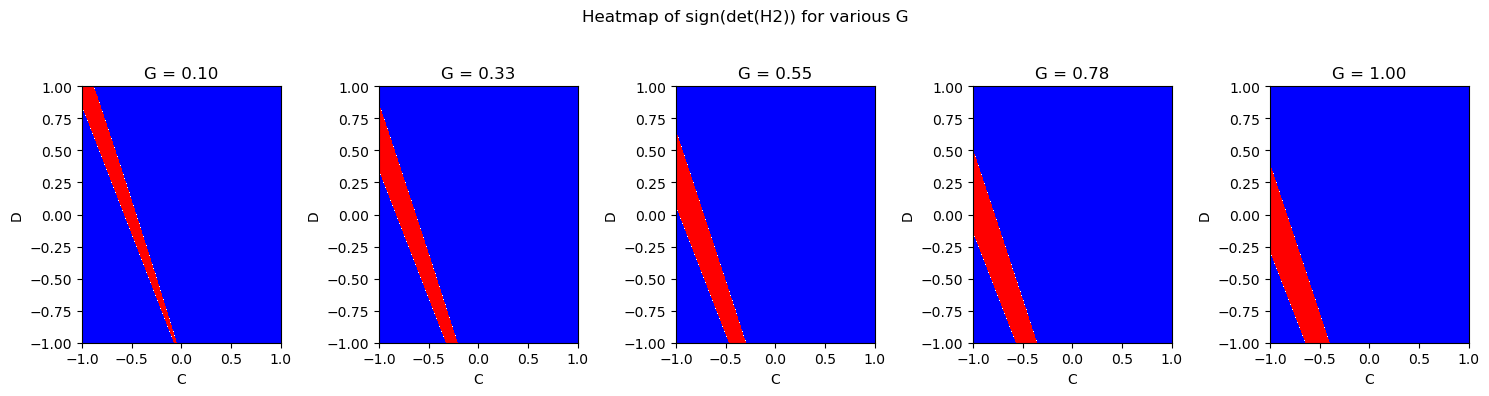

In [419]:
import numpy as np
import matplotlib.pyplot as plt
# Define symbols
A, C, D, G = sp.symbols('A C D G', real=True)

H2=H_int6.det().subs({psi1:(9/(4*G)*(-(2*C+D+sp.sqrt((2*C+D)**2 -(8/3)*A*G)))) , psi1c: (9/(4*G)*(-(2*C+D+sp.sqrt((2*C+D)**2 -(8/3)*A*G))))})



# Define the determinant expression H2 (symbolically)
expr = H2 
# User-provided symbolic H2 expression
# For demo, let's assume H2 = C + D - G  # Placeholder; replace with actual expr

# Lambdify to numeric function
H2_func = sp.lambdify((A, C, D, G), expr, 'numpy')

# Parameters
A_val = -1
Gs = np.linspace(0.1, 1.0, 5)  # 5 values of G
C_vals = np.linspace(-1, 1, 200)
D_vals = np.linspace(-1, 1, 200)

# Prepare plot
fig, axes = plt.subplots(1, len(Gs), figsize=(15, 4))
cmap = plt.matplotlib.colors.ListedColormap(['red', 'white', 'blue'])
bounds = [-1.5, -0.5, 0.5, 1.5]
norm = plt.matplotlib.colors.BoundaryNorm(bounds, cmap.N)

for ax, G_val in zip(axes, Gs):
    # Evaluate determinant grid
    C_grid, D_grid = np.meshgrid(C_vals, D_vals)
    H2_grid = H2_func(A_val, C_grid, D_grid, G_val)
    
    # Classification
    class_grid = np.zeros_like(H2_grid)
    class_grid[H2_grid > 0] = 1
    class_grid[H2_grid < 0] = -1
    
    # Plot
    img = ax.imshow(class_grid, origin='lower', extent=(C_vals.min(), C_vals.max(), D_vals.min(), D_vals.max()),
                    cmap=cmap, norm=norm, aspect='auto')
    ax.set_title(f'G = {G_val:.2f}')
    ax.set_xlabel('C')
    ax.set_ylabel('D')

fig.suptitle('Heatmap of sign(det(H2)) for various G')
plt.tight_layout(rect=[0, 0, 1, 0.95])


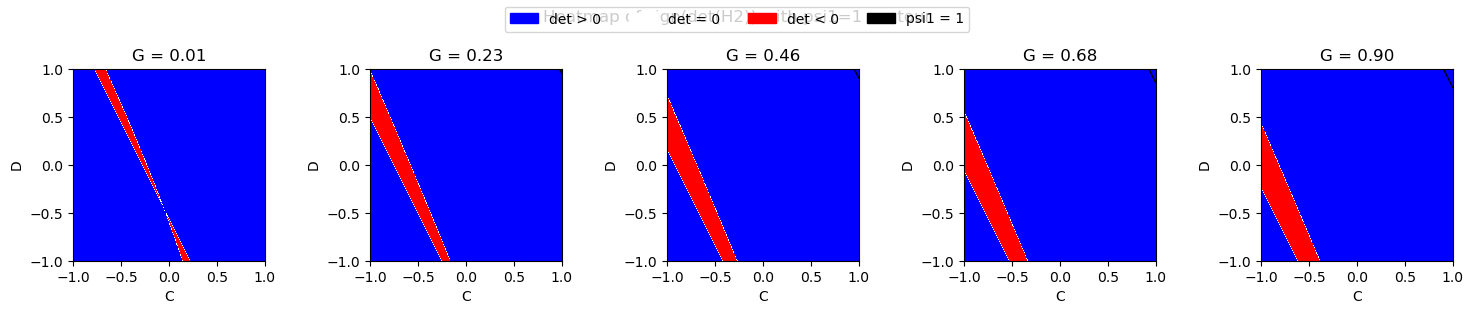

In [434]:
# Define symbols
A, C, D, G = sp.symbols('A C D G', real=True)

# Define psi1 symbolic expression
psi1_sym = 9/(4*G) * (-(2*C + D) + sp.sqrt((2*C + D)**2 - (8/3)*A*G))

# Define H2 symbolic determinant from Hessian (assuming H_int6 is defined)
# Replace H_int6 with your actual Hessian matrix variable
# H2_sym = sp.simplify(H_int6.det().subs({psi1: psi1_sym, psi1c: psi1_sym}))
# For demonstration, we use psi1_sym - 1 to create a placeholder H2_sym

# Lambdify expressions for numeric evaluation
psi1_func = sp.lambdify((A, C, D, G), psi1_sym, 'numpy')


# Grid settings
A_val = -1
G_values = np.linspace(0.01, 0.9, 5)
C_vals = np.linspace(-1, 1, 300)
D_vals = np.linspace(-1, 1, 300)
C_grid, D_grid = np.meshgrid(C_vals, D_vals)

# Colormap and classification
cmap = plt.matplotlib.colors.ListedColormap(['red', 'white', 'blue'])
bounds = [-1.5, -0.5, 0.5, 1.5]
norm = plt.matplotlib.colors.BoundaryNorm(bounds, cmap.N)

# Plot heatmaps with contour for psi1 = 1
fig, axes = plt.subplots(1, len(G_values), figsize=(15, 3))
for ax, G_val in zip(axes, G_values):
    # Evaluate determinant grid and psi1 grid
    H2_grid = H2_func(A_val, C_grid, D_grid, G_val)
    psi1_grid = psi1_func(A_val, C_grid, D_grid, G_val)
    
    # Classify sign for H2
    class_grid = np.zeros_like(H2_grid)
    class_grid[H2_grid > 0] = 1
    class_grid[H2_grid < 0] = -1
    
    # Show heatmap
    im = ax.imshow(class_grid, origin='lower',
                   extent=(C_vals.min(), C_vals.max(), D_vals.min(), D_vals.max()),
                   cmap=cmap, norm=norm, aspect='equal')
    
    # Add contour where psi1 = 1
    contour = ax.contour(C_grid, D_grid, psi1_grid, levels=[1.0], colors='black', linewidths=1)
    
    ax.set_title(f'G = {G_val:.2f}')
    ax.set_xlabel('C')
    ax.set_ylabel('D')

# Add color legend
from matplotlib.patches import Patch
legend_elements = [Patch(color='blue', label='det > 0'),
                   Patch(color='white', label='det = 0'),
                   Patch(color='red', label='det < 0'),
                   Patch(color='black', label='psi1 = 1')]
fig.legend(handles=legend_elements, loc='upper center', ncol=4)
fig.suptitle('Heatmap of sign(det(H2)) with psi1=1 contour')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/var/folders/kj/t4mlwngd4xd5339jy_pt1t180000gn/T/ipykernel_18362/2424030512.py:31: UserWarning: No contour levels were found within the data range.
  ax.contour(G_grid, D_grid, psi1_grid, levels=[1.0], colors='black', linewidths=1)


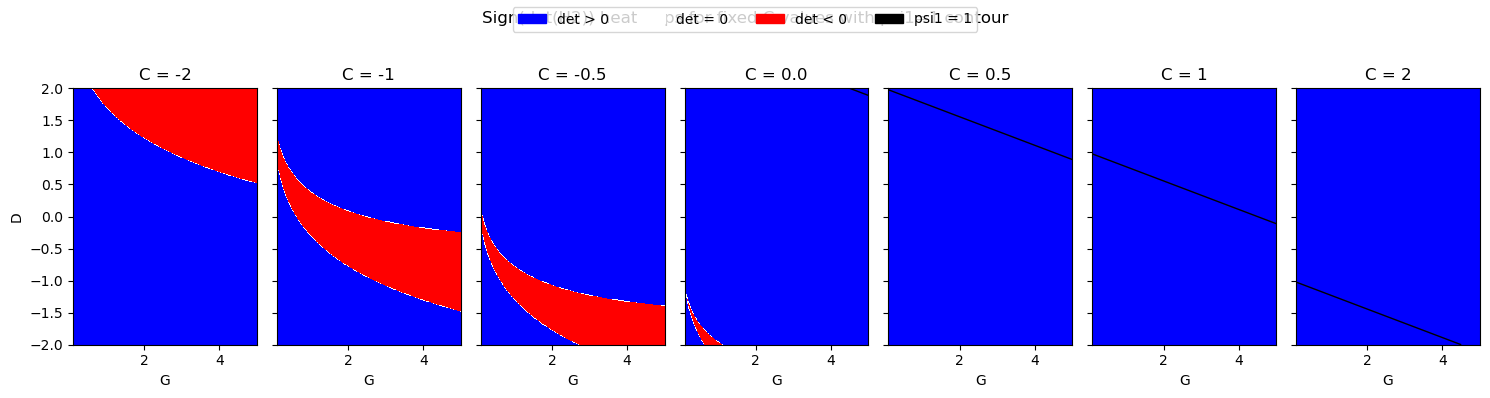

In [421]:





# Parameters
A_val = -1
C_values = [-2,-1,-0.5 ,0.0,0.5,1, 2]  # select C values
G_vals = np.linspace(0.1, 5.0, 300)
D_vals = np.linspace(-2.0, 2.0, 300)
G_grid, D_grid = np.meshgrid(G_vals, D_vals)

# Colormap and normalization
cmap = plt.matplotlib.colors.ListedColormap(['red', 'white', 'blue'])
bounds = [-1, -0.5, 0.5, 1]
norm = plt.matplotlib.colors.BoundaryNorm(bounds, cmap.N)

# Plot heatmaps for each C
fig, axes = plt.subplots(1, len(C_values), figsize=(15, 4), sharey=True)
for ax, C_val in zip(axes, C_values):
    # Evaluate on G-D grid
    H2_grid = H2_func(A_val, C_val, D_grid, G_grid)  # note argument order matches lambdify
    psi1_grid = psi1_func(A_val, C_val, D_grid, G_grid)
    
    # Classify sign of H2
    class_grid = np.zeros_like(H2_grid)
    class_grid[H2_grid > 0] = 1
    class_grid[H2_grid < 0] = -1
    
    # Plot heatmap
    im = ax.imshow(class_grid, origin='lower',
                   extent=(G_vals.min(), G_vals.max(), D_vals.min(), D_vals.max()),
                   aspect='auto', cmap=cmap, norm=norm)
    
    # Overlay contour where psi1 = 1
    ax.contour(G_grid, D_grid, psi1_grid, levels=[1.0], colors='black', linewidths=1)
    
    ax.set_title(f'C = {C_val}')
    ax.set_xlabel('G')
    if ax is axes[0]:
        ax.set_ylabel('D')

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(color='blue', label='det > 0'),
    Patch(color='white', label='det = 0'),
    Patch(color='red', label='det < 0'),
    Patch(color='black', label='psi1 = 1')
]
fig.legend(handles=legend_elements, loc='upper center', ncol=4)
fig.suptitle('Sign(det(H2)) heatmaps for fixed C values with psi1=1 contour')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


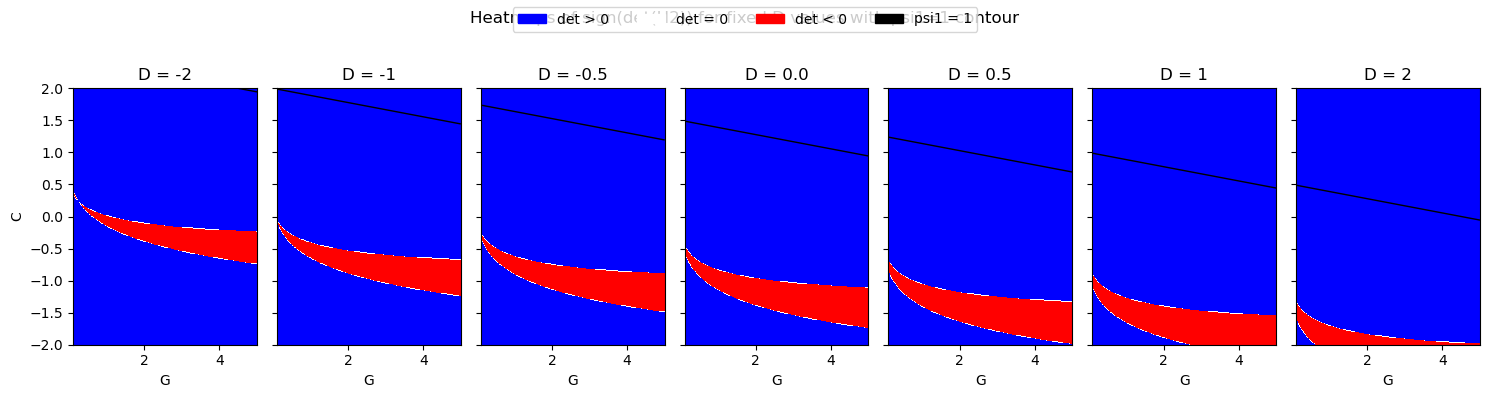

In [422]:
# Parameters
A_val = -1
D_values = [-2,-1,-0.5, 0.0, 0.5,1,2]   # pick values of D
G_vals = np.linspace(0.1, 5.0, 300)
C_vals = np.linspace(-2.0, 2.0, 300)
G_grid, C_grid = np.meshgrid(G_vals, C_vals)

# Colormap
cmap = plt.matplotlib.colors.ListedColormap(['red', 'white', 'blue'])
bounds = [-1.5, -0.5, 0.5, 1.5]
norm = plt.matplotlib.colors.BoundaryNorm(bounds, cmap.N)

# Plot heatmaps for each D
fig, axes = plt.subplots(1, len(D_values), figsize=(15, 4), sharey=True)
for ax, D_val in zip(axes, D_values):
    # Evaluate grids
    H2_grid  = H2_func(A_val, C_grid, D_val, G_grid)
    psi1_grid= psi1_func(A_val, C_grid, D_val, G_grid)
    
    # Classify sign of H2
    class_grid = np.zeros_like(H2_grid)
    class_grid[H2_grid > 0] = 1
    class_grid[H2_grid < 0] = -1
    
    # Display heatmap: x=G, y=C
    im = ax.imshow(class_grid, origin='lower',
                   extent=(G_vals.min(), G_vals.max(), C_vals.min(), C_vals.max()),
                   aspect='auto', cmap=cmap, norm=norm)
    
    # Overlay psi1=1 contour
    ax.contour(G_grid, C_grid, psi1_grid, levels=[1.0], colors='black', linewidths=1)
    
    ax.set_title(f'D = {D_val}')
    ax.set_xlabel('G')
    if ax is axes[0]:
        ax.set_ylabel('C')

# Legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(color='blue', label='det > 0'),
    Patch(color='white', label='det = 0'),
    Patch(color='red', label='det < 0'),
    Patch(color='black', label='psi1 = 1')
]
fig.legend(handles=legend_elements, loc='upper center', ncol=4)
fig.suptitle('Heatmaps of sign(det(H2)) for fixed D values with psi1=1 contour')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [423]:

H2.subs({A:-1,G:0.1,C:-1,D:-1})

0.168874902655494

# Misc (Original attempt with wrong hessian)

In [424]:
## to check blocks
##evaluated at psi2 = 0
Hstar = sp.simplify(H).subs({ psi1c: sp.conjugate(psi1), psi2c: 0 ,psi2: 0})
sp.simplify(Hstar)

Matrix([
[A/3 + 4*C*psi1*conjugate(psi1)/9 + 2*D*psi1*conjugate(psi1)/9, -A/6 - 2*C*psi1*conjugate(psi1)/9 - D*psi1*conjugate(psi1)/9],
[ -A/6 - 2*C*psi1*conjugate(psi1)/9 - D*psi1*conjugate(psi1)/9, A/3 + 5*C*psi1*conjugate(psi1)/18 + D*psi1*conjugate(psi1)/9]])

In [425]:
## Hessian evaluated at f.p.
H_eval=Hstar.subs({psi1:-1*r,sp.conjugate(psi1):r})
sp.simplify(H_eval)

Matrix([
[  (2*A*G**2 - 54*C*(C + D/2 + 0.816496580927726*sqrt(-A*G + 0.375*(2*C + D)**2))**2 - 27*D*(C + D/2 + 0.816496580927726*sqrt(-A*G + 0.375*(2*C + D)**2))**2)/(6*G**2), (-2*A*G**2 + 54*C*(C + D/2 + 0.816496580927726*sqrt(-A*G + 0.375*(2*C + D)**2))**2 + 27*D*(C + D/2 + 0.816496580927726*sqrt(-A*G + 0.375*(2*C + D)**2))**2)/(12*G**2)],
[(-2*A*G**2 + 54*C*(C + D/2 + 0.816496580927726*sqrt(-A*G + 0.375*(2*C + D)**2))**2 + 27*D*(C + D/2 + 0.816496580927726*sqrt(-A*G + 0.375*(2*C + D)**2))**2)/(12*G**2), (8*A*G**2 - 135*C*(C + D/2 + 0.816496580927726*sqrt(-A*G + 0.375*(2*C + D)**2))**2 - 54*D*(C + D/2 + 0.816496580927726*sqrt(-A*G + 0.375*(2*C + D)**2))**2)/(24*G**2)]])

In [426]:

Hdet = Hstar.det().subs({psi1:-1*r,sp.conjugate(psi1):r})
sp.simplify(Hdet)


(4*A**2*G**4 - 18*A*G**2*(9*C + 4*D)*(C + D/2 + 0.816496580927726*sqrt(-A*G + 0.375*(2*C + D)**2))**2 + 243*(C + D/2 + 0.816496580927726*sqrt(-A*G + 0.375*(2*C + D)**2))**4*(6*C**2 + 5*C*D + D**2))/(48*G**4)

In [427]:
H_sub = Hstar.subs({psi1: -r, sp.conjugate(psi1): r})
eigs = H_sub.eigenvals() 
eigs_simpl = { sp.simplify(ev): m for ev, m in eigs.items() }

sp.simplify(eigs_simpl) 

{(4.875*A*C*G + 2.25*A*D*G + 0.333333333333333*A*G**2 - 14.625*C**3 - 21.375*C**2*D - 14.625*C**2*sqrt(-0.666666666666667*A*G + C**2 + C*D + 0.25*D**2) - 10.40625*C*D**2 - 14.0625*C*D*sqrt(-0.666666666666667*A*G + C**2 + C*D + 0.25*D**2) - 1.6875*D**3 - 3.375*D**2*sqrt(-0.666666666666667*A*G + C**2 + C*D + 0.25*D**2) - 26.6935736648355*sqrt(0.0144069469113874*A**2*C**2*G**2 + 0.0149990132228143*A**2*C*D*G**2 + 0.00140341644190075*A**2*C*G**3 + 0.00394710874284586*A**2*D**2*G**2 + 0.000701708220950376*A**2*D*G**3 + 3.89837900527987e-5*A**2*G**4 - 0.172883362936649*A*C**4*G - 0.35287152161042*A*C**3*D*G - 0.00421024932570226*A*C**3*G**2 - 0.0864416814683244*A*C**3*G*sqrt(-0.666666666666667*A*G + C**2 + C*D + 0.25*D**2) - 0.270574304322084*A*C**2*D**2*G - 0.00631537398855339*A*C**2*D*G**2 - 0.133214920071048*A*C**2*D*G*sqrt(-0.666666666666667*A*G + C**2 + C*D + 0.25*D**2) - 0.00421024932570226*A*C**2*G**2*sqrt(-0.666666666666667*A*G + C**2 + C*D + 0.25*D**2) - 0.0923623445825932*A*C*D**3*

Thus the determinant of the Hessian is given by
$$\text{det}(H) = \cfrac{-AD^{2}}{74C + 36D}$$

In [428]:
expr = (
      (A*A)/12
    + (A*C)/6      * (-3*A/(2*C + D))
    + 2*(A*D)/27   * (-3*A/(2*C + D))
    + (2*C**2)/27     * (-3*A/(2*C + D))**2
    + (5*C*D)/81   * (-3*A/(2*C + D))**2
    + (D**2)/81    * (-3*A/(2*C + D))**2
)

sp.simplify(expr)

-A**2*D/(72*C + 36*D)

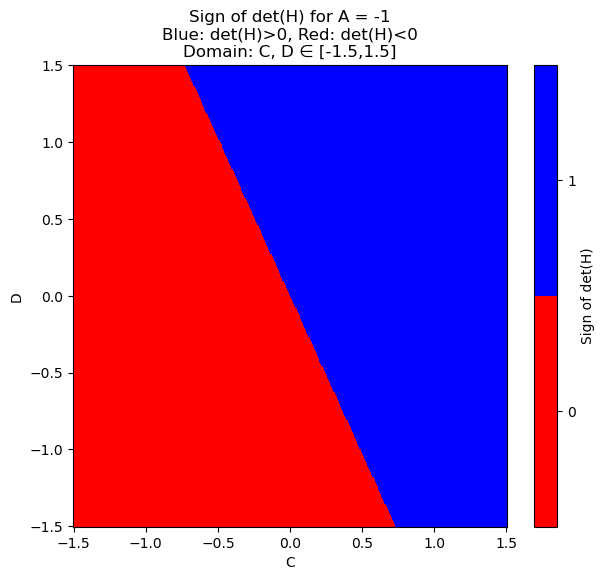

In [429]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Parameters
A = -1
C_vals = np.linspace(-1.5, 1.5, 400)
D_vals = np.linspace(-1.5, 1.5, 400)
C, D = np.meshgrid(C_vals, D_vals)

# Compute determinant det(H) = -A * D^2 / (74*C + 36*D)
denominator = 74 * C + 36 * D
detH = np.full_like(C, np.nan, dtype=float)
valid = np.abs(denominator) > 1e-6
detH[valid] = -A * D[valid]**2 / denominator[valid]

# Create mask: 1 if detH>0, 0 if detH<0
mask = np.zeros_like(detH, dtype=int)
mask[detH > 0] = 1

# Define two-color map: red for 0, blue for 1
cmap = ListedColormap(['red', 'blue'])

# Plot
plt.figure(figsize=(7,6))
plt.pcolormesh(C, D, mask, cmap=cmap, shading='auto')
plt.colorbar(ticks=[0,1], label='Sign of det(H)')
plt.clim(-0.5, 1.5)
plt.xlabel('C')
plt.ylabel('D')
plt.title('Sign of det(H) for A = -1\nBlue: det(H)>0, Red: det(H)<0\nDomain: C, D ∈ [-1.5,1.5]')
plt.show()

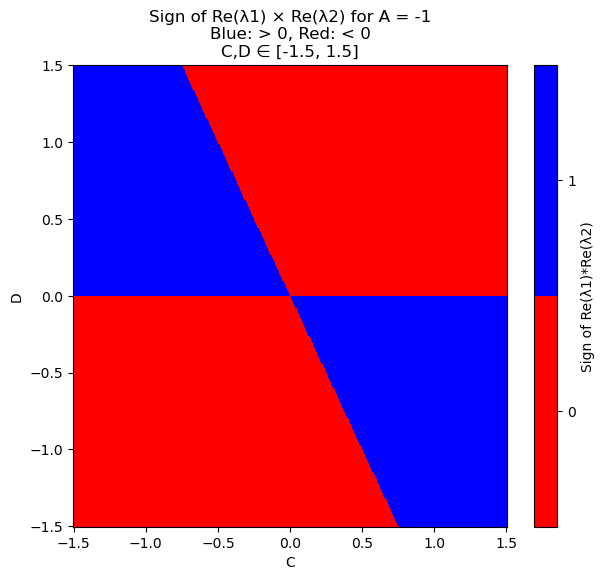

In [430]:
# Fixed parameter
A = -1

# Grid for C and D
C_vals = np.linspace(-1.5, 1.5, 400)
D_vals = np.linspace(-1.5, 1.5, 400)
C, D = np.meshgrid(C_vals, D_vals)

# Avoid singularity where denominator is zero
den = 12 * (2*C + D)
valid = np.abs(den) > 1e-6

# Compute the discriminant inside the square root
disc = 25*C**2 + 28*C*D + 8*D**2
sqrt_disc = np.sqrt(disc)

# Compute the two eigenvalues λ1 and λ2
num1 = A * (-5*C - 2*D - sqrt_disc)
num2 = A * (-5*C - 2*D + sqrt_disc)
lambda1 = np.zeros_like(C, dtype=complex)
lambda2 = np.zeros_like(C, dtype=complex)
lambda1[valid] = num1[valid] / den[valid]
lambda2[valid] = num2[valid] / den[valid]

# Compute the product of their real parts
prod_real = np.real(lambda1) * np.real(lambda2)

# Create a mask: 1 if positive, 0 if negative or zero
mask = np.zeros_like(prod_real, dtype=int)
mask[prod_real > 0] = 1

# Define a two-color map: red for negative, blue for positive
cmap = ListedColormap(['red', 'blue'])

# Plot the heatmap
plt.figure(figsize=(7, 6))
plt.pcolormesh(C, D, mask, cmap=cmap, shading='auto')
plt.colorbar(ticks=[0, 1], label='Sign of Re(λ1)*Re(λ2)')
plt.clim(-0.5, 1.5)
plt.xlabel('C')
plt.ylabel('D')
plt.title('Sign of Re(λ1) × Re(λ2) for A = -1\nBlue: > 0, Red: < 0\nC,D ∈ [-1.5, 1.5]')
plt.show()

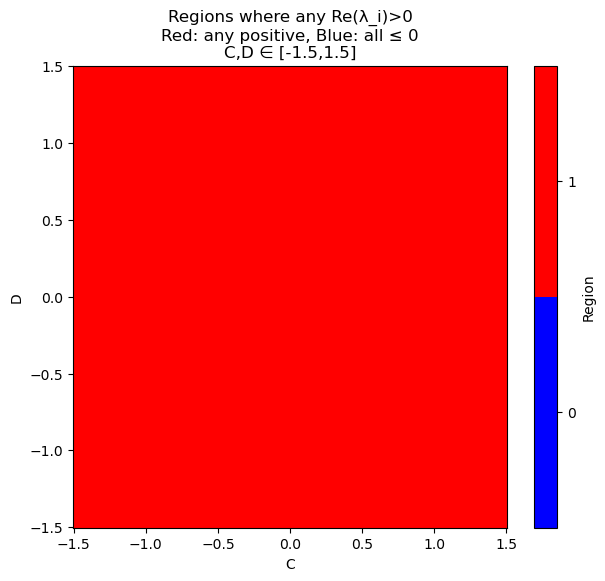

In [431]:
# Fixed parameter
A = -1

# Grid for C and D
C_vals = np.linspace(-1.5, 1.5, 400)
D_vals = np.linspace(-1.5, 1.5, 400)
C, D = np.meshgrid(C_vals, D_vals)

# Avoid singularity where denominator is zero
den = 12 * (2*C + D)
valid = np.abs(den) > 1e-6

# Compute discriminant inside sqrt
disc = 25*C**2 + 28*C*D + 8*D**2
sqrt_disc = np.sqrt(disc)

# Compute eigenvalues λ1 and λ2
num1 = A * (-5*C - 2*D - sqrt_disc)
num2 = A * (-5*C - 2*D + sqrt_disc)
lambda1 = np.zeros_like(C, dtype=complex)
lambda2 = np.zeros_like(C, dtype=complex)
lambda1[valid] = num1[valid] / den[valid]
lambda2[valid] = num2[valid] / den[valid]

# Determine mask: red if any Re(λ) > 0, blue otherwise
mask = np.zeros_like(C, dtype=int)  # 0->blue, 1->red
mask[(np.real(lambda1) > 0) | (np.real(lambda2) > 0)] = 1

# Define colormap: blue for 0, red for 1
cmap = ListedColormap(['blue', 'red'])

# Plot the heatmap
plt.figure(figsize=(7, 6))
plt.pcolormesh(C, D, mask, cmap=cmap, shading='auto')
plt.colorbar(ticks=[0, 1], label='Region')
plt.clim(-0.5, 1.5)
plt.xlabel('C')
plt.ylabel('D')
plt.title('Regions where any Re(λ_i)>0\nRed: any positive, Blue: all ≤ 0\nC,D ∈ [-1.5,1.5]')
plt.show()

# Appendix 
## A1. Real Hessian in $z,z^{*}$
Let
$$
u = \begin{pmatrix}x\\y\end{pmatrix}, 
\quad
v = \begin{pmatrix}z\\\ z^{*}\end{pmatrix},
$$
with
$$
z = x + i\,y,
\quad
 z^{*} = x - i\,y.
$$

Then the change‐of‐variables matrix and its Hermitian adjoint are
$$
T = \frac12
\begin{pmatrix}
1 & 1\\[6pt]
-\,i & i
\end{pmatrix},
\qquad
T^* = \overline{T}^{\,T}
= \frac12
\begin{pmatrix}
1 & i\\[6pt]
1 & -\,i
\end{pmatrix}.
$$

If the real–variable Hessian is
$$
H_{(x,y)} =
\begin{pmatrix}
f_{xx} & f_{xy}\\[6pt]
f_{yx} & f_{yy}
\end{pmatrix},
$$
then in the $(z, z^{*})$–coordinates the Hessian transforms as
$$
H_{(z,z^{*})} \;=\;T^*\,H_{(x,y)}\,T.
$$

Carrying out the block‐multiplication gives
\begin{align*}
H_{zz}
&=\frac{1}{4}\bigl(f_{xx}+f_{yy}\bigr),\\[6pt]
H_{z z^{*}}
&=\frac{1}{4}\bigl(f_{xx}-f_{yy}+2\,i\,f_{xy}\bigr),\\[6pt]
H_{ z^{*} z}
&=\frac{1}{4}\bigl(f_{xx}-f_{yy}-2\,i\,f_{xy}\bigr),\\[6pt]
H_{ z^{*} z^{*}}
&=\frac{1}{4}\bigl(f_{xx}+f_{yy}\bigr).
\end{align*}

Hence
$$
H_{(z, z^{*})}
=\frac14
\begin{pmatrix}
f_{xx}+f_{yy} & f_{xx}-f_{yy}+2\,i\,f_{xy}\\[6pt]
f_{xx}-f_{yy}-2\,i\,f_{xy} & f_{xx}+f_{yy}
\end{pmatrix} = \begin{pmatrix}
 f_{zz^{*}} & f_{z^{*}z^{*}}\\
          f_{zz} & f_{z^{*}z}
\end{pmatrix}  .
$$


## A2. nematics comparison

In [432]:
# Define symbols for order parameters and coefficients
s1, s2, A, B, C ,D= sp.symbols('s1 s2 A B C D', real=True)

# Define the biaxial Q-tensor (trace-free) in 3D
d = -s1 - s2  # third diagonal element to enforce tracelessness
Q = sp.Matrix([[s1, 0, 0],
               [0, s2, 0],
               [0, 0, d]])

# Compute invariants
I2 = (Q*Q).trace()   # tr(Q^2)
I3 = (Q*Q*Q).trace() # tr(Q^3)

# Landau–de Gennes free-energy density F(s1,s2)
F = A*I2 + B*I3 + C*(I2**2) 
F = sp.simplify(F)

# Compute gradient
grad_F = [sp.diff(F, var) for var in (s1, s2)]

# Imposing uniaxial constraint: s2 = 0
d_uniax = F.subs(s2, 0)

# Solve for critical s1 under s2=0: dF/ds1 = 0
dF_ds1 = sp.diff(d_uniax, s1)
crit_s1 = sp.solve(dF_ds1, s1)

# Compute Hessian of full F(s1,s2)
H = sp.hessian(F, (s1, s2))

# Evaluate Hessian at s2=0 and each critical s1
H_eval = {val: H.subs({s1: val, s2: 0}) for val in crit_s1}

# For each Hessian, compute eigenvalues to assess stability
def eval_eig(matrix):
    return matrix.eigenvals()

stability = {val: eval_eig(H_eval[val]) for val in H_eval}

# Display results
print("Critical s1 (uniaxial):", crit_s1)
print("Hessians at critical points:")
for val, mat in H_eval.items():
    print(f"\ns1 = {val}, s2 = 0:")
    sp.pprint(mat)
    print("Eigenvalues:", stability[val])

Critical s1 (uniaxial): [0, -sqrt(-A/C)/2, sqrt(-A/C)/2]
Hessians at critical points:

s1 = 0, s2 = 0:
⎡4⋅A  2⋅A⎤
⎢        ⎥
⎣2⋅A  4⋅A⎦
Eigenvalues: {6*A: 1, 2*A: 1}

s1 = -sqrt(-A/C)/2, s2 = 0:
⎡                                 _____          ⎤
⎢            -A                  ╱ -A         -A ⎥
⎢        8⋅C⋅───          3⋅B⋅  ╱  ───  + 4⋅C⋅───⎥
⎢             C               ╲╱    C          C ⎥
⎢                                                ⎥
⎢        _____                    _____          ⎥
⎢       ╱ -A         -A          ╱ -A         -A ⎥
⎢3⋅B⋅  ╱  ───  + 4⋅C⋅───  3⋅B⋅  ╱  ───  + 2⋅C⋅───⎥
⎣    ╲╱    C          C       ╲╱    C          C ⎦
Eigenvalues: {-5*A + 3*B*sqrt(-A/C)/2 - sqrt(C*(-36*A*B**2 + C*(10*A - 3*B*sqrt(-A/C))**2))/(2*C): 1, -5*A + 3*B*sqrt(-A/C)/2 + sqrt(C*(-36*A*B**2 + C*(10*A - 3*B*sqrt(-A/C))**2))/(2*C): 1}

s1 = sqrt(-A/C)/2, s2 = 0:
⎡                                     _____          ⎤
⎢             -A                     ╱ -A         -A ⎥
⎢         8⋅C⋅─── 

Here we see the difference if $B = 0$ these equillibria collapse too saddles!

In [433]:
# Evaluate Hessian at s2=0 and each critical s1
H_eval = {val: H.subs({s1: val, s2: 0,B:0}) for val in crit_s1}

# For each Hessian, compute eigenvalues to assess stability
def eval_eig(matrix):
    return matrix.eigenvals()

stability = {val: eval_eig(H_eval[val]) for val in H_eval}

# Display results
print("Critical s1 (uniaxial):", crit_s1)
print("Hessians at critical points:")
for val, mat in H_eval.items():
    print(f"\ns1 = {val}, s2 = 0:")
    sp.pprint(mat)
    print("Eigenvalues:", stability[val])

Critical s1 (uniaxial): [0, -sqrt(-A/C)/2, sqrt(-A/C)/2]
Hessians at critical points:

s1 = 0, s2 = 0:
⎡4⋅A  2⋅A⎤
⎢        ⎥
⎣2⋅A  4⋅A⎦
Eigenvalues: {6*A: 1, 2*A: 1}

s1 = -sqrt(-A/C)/2, s2 = 0:
⎡    -A       -A ⎤
⎢8⋅C⋅───  4⋅C⋅───⎥
⎢     C        C ⎥
⎢                ⎥
⎢    -A       -A ⎥
⎢4⋅C⋅───  2⋅C⋅───⎥
⎣     C        C ⎦
Eigenvalues: {-10*A: 1, 0: 1}

s1 = sqrt(-A/C)/2, s2 = 0:
⎡    -A       -A ⎤
⎢8⋅C⋅───  4⋅C⋅───⎥
⎢     C        C ⎥
⎢                ⎥
⎢    -A       -A ⎥
⎢4⋅C⋅───  2⋅C⋅───⎥
⎣     C        C ⎦
Eigenvalues: {-10*A: 1, 0: 1}
